# 01 INTRO: Árboles de Decisión
Explicación de cómo construír árboles de decisión.

Notebook original por [Javier Blanco Cordero](https://www.linkedin.com/in/javier-blanco-cordero-71373656/).

## 0101 Qué es un árbol de decisión?
Un tipo de algoritmo de aprendizaje supervisado que se basa en realizar particiones a partir de distintos niveles de las variables disponibles.

## 0102 Import
Importamos todas las librerías necesarias para este análisis ([¿No sabes lo que es una librería de Python?](https://www.quora.com/What-is-a-Python-library-and-what-can-I-use-it-for)): pandas, numpy, seaborn, matplotlib.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 0103 Carga el dataset de notas de estudiantes
Para probar a hacer árboles de decisión de Regresión utilizaremos un dataset sobre las notas de ciertos estudiantes portugueses de dos instituos en función de ciertas características socio-demográficas. El dataset original se puede encontrr en Kaggle ([aquí](https://www.kaggle.com/dipam7/student-grade-prediction)).

Podéis encontrar una versión lista para usar con árboles de decisión en en mi github: 'https://raw.githubusercontent.com/astrojuanlu/the-valley-mds-arboles/main/data/Notas_Estudiantes_Limpio.csv'.

Importa este dataset en un dataframe llamado **df**.

In [ ]:
# Url archivo raw
url = "https://raw.githubusercontent.com/astrojuanlu/the-valley-mds-arboles/main/data/Notas_Estudiantes_Limpio.csv"

# Importa csv
df = pd.read_csv(url)

# Visualización primeras filas
df.head()

,Nota,Genero,Edad,Entorno Urbano,Familia <=3,Padres Separados,Nivel Edu Madre,Nivel Edu Padre,Tutor No Paterno,Tiempo Casa-Escuela,...,Extraescolares,Acceso Internet,Relación Romántica,Calidad Relación Familiar,Tiempo Estudio,Sale con Amigos,Alcohol Semana,Alcohol Finde,Estado Salud,Ausencias
0,3.0,0,18,1,0,1,4,4,0,2,...,0,0,0,4,3,4,1,1,3,6
1,3.0,0,17,1,0,0,1,1,0,1,...,0,1,0,5,3,3,1,1,3,4
2,5.0,0,15,1,1,0,1,1,0,1,...,0,1,0,4,3,2,2,3,3,10
3,7.5,0,15,1,0,0,4,2,0,1,...,1,1,1,3,2,2,1,1,5,2
4,5.0,0,16,1,0,0,3,3,0,1,...,0,0,0,4,3,2,1,2,5,4


# 02 EDA
Realizaremos un pequeño análisis exploratorio visual para familiarizarnos con el dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Nota                       395 non-null    float64
 1   Genero                     395 non-null    int64  
 2   Edad                       395 non-null    int64  
 3   Entorno Urbano             395 non-null    int64  
 4   Familia <=3                395 non-null    int64  
 5   Padres Separados           395 non-null    int64  
 6   Nivel Edu Madre            395 non-null    int64  
 7   Nivel Edu Padre            395 non-null    int64  
 8   Tutor No Paterno           395 non-null    int64  
 9   Tiempo Casa-Escuela        395 non-null    int64  
 10  Tiempo Estudio Semanal     395 non-null    int64  
 11  Extraescolares             395 non-null    int64  
 12  Acceso Internet            395 non-null    int64  
 13  Relación Romántica         395 non-null    int64  

In [ ]:
df.describe()

,Nota,Genero,Edad,Entorno Urbano,Familia <=3,Padres Separados,Nivel Edu Madre,Nivel Edu Padre,Tutor No Paterno,Tiempo Casa-Escuela,...,Extraescolares,Acceso Internet,Relación Romántica,Calidad Relación Familiar,Tiempo Estudio,Sale con Amigos,Alcohol Semana,Alcohol Finde,Estado Salud,Ausencias
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,5.207595,0.473418,16.696203,0.777215,0.288608,0.103797,2.749367,2.521519,0.081013,1.448101,...,0.508861,0.832911,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,2.290721,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,0.273201,0.697505,...,0.500555,0.373528,0.472300,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,0.000000,16.000000,1.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,5.500000,0.000000,17.000000,1.000000,0.000000,0.000000,3.000000,2.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,7.000000,1.000000,18.000000,1.000000,1.000000,0.000000,4.000000,3.000000,0.000000,2.000000,...,1.000000,1.000000,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,10.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,1.000000,4.000000,...,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


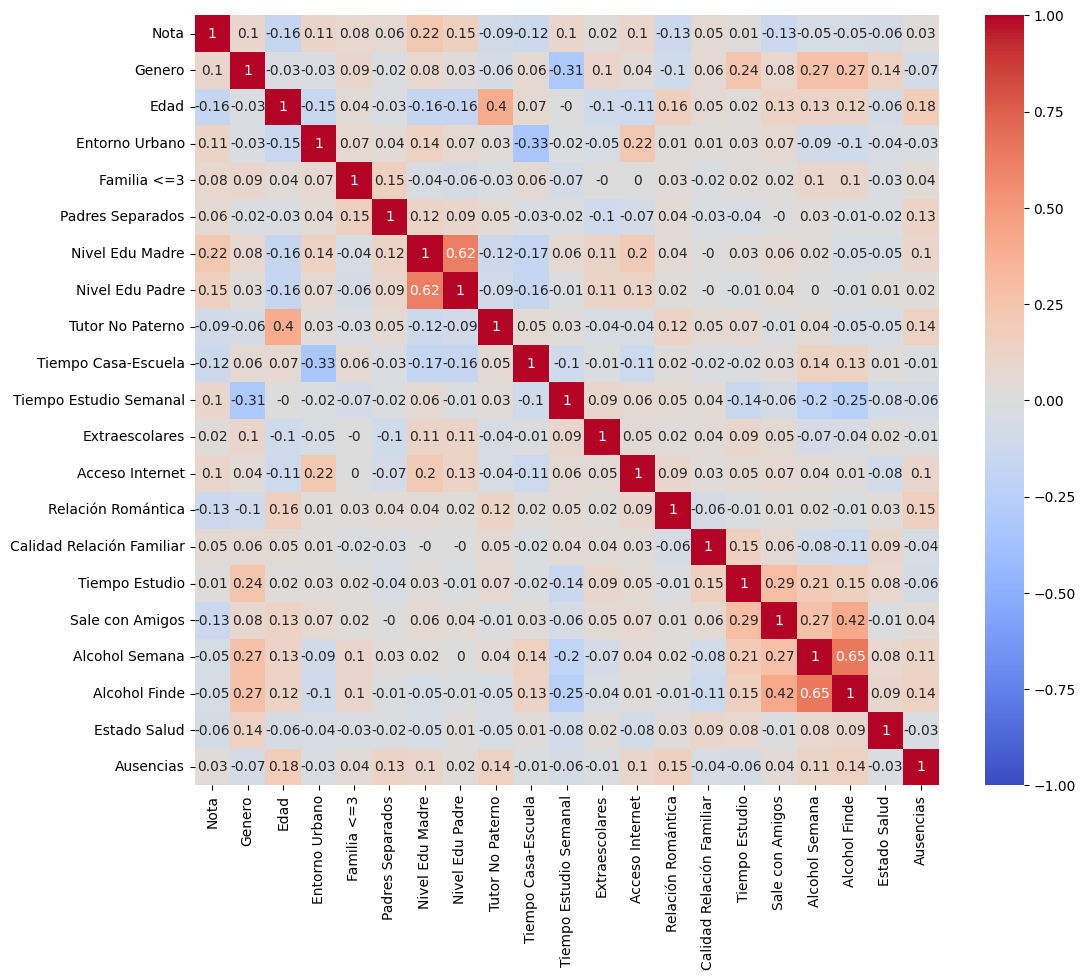

In [ ]:
# Visualización coeficientes Pearson
plt.figure(figsize=(12, 10))
sns.heatmap(np.round(df.corr(), 2), vmin=-1, vmax=1, annot=True, cmap="coolwarm")
plt.show()

# 03 Construcción árbol de decisión con scikit learn
Utilizando la librería [scikit learn](https://scikit-learn.org/stable/), la libería básica de referencia para machine learning, construíremos un árbol de decisión de regresión.

In [ ]:
# Siguiendo el ejemplo de las diapositivas, entrenaremos un modelo
# utilizando sólo las variables 'Nivel Edu Madre', 'Tiempo Estudio', 'Ausencias'
cols = ["Nivel Edu Madre", "Tiempo Estudio", "Ausencias"]
X = df[cols]
y = df["Nota"]

## 0301 Importamos las librerías

In [ ]:
# Nos importamos las funciones de árboles de scikit learn
from sklearn import tree

## 0302 Inicializamos el árbol
Definiendo las características que tendrá.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [ ]:
# Inicializamos un árbol. Por ahora está vacío.
# Solo definimos cómo queremos que sea en cuanto a su estructura y condiciones de entrenamiento
arbol = tree.DecisionTreeRegressor()
arbol

DecisionTreeRegressor()

## 0303 Entrenamos el modelo
Una vez inicializado y definido el árbol, el método .[fit()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit) realiza el proceso de particionado recursivo que hemos hecho nosotros antes a mano.

In [ ]:
# Entrenamos el árbol inicializado a partir de los datos que le pasemos con .fit()
arbol = arbol.fit(X=X, y=y)
arbol

DecisionTreeRegressor()

##0304 Visualizamos el modelo
Una vez entrenado el modelo, podemos visualizarlo.

In [ ]:
# Con el método export_text
print(tree.export_text(arbol, feature_names=list(X.columns)))

|--- Ausencias <= 0.50
|   |--- Nivel Edu Madre <= 2.50
|   |   |--- Nivel Edu Madre <= 0.50
|   |   |   |--- value: [7.50]
|   |   |--- Nivel Edu Madre >  0.50
|   |   |   |--- Tiempo Estudio <= 1.50
|   |   |   |   |--- value: [0.00]
|   |   |   |--- Tiempo Estudio >  1.50
|   |   |   |   |--- Nivel Edu Madre <= 1.50
|   |   |   |   |   |--- Tiempo Estudio <= 3.50
|   |   |   |   |   |   |--- Tiempo Estudio <= 2.50
|   |   |   |   |   |   |   |--- value: [2.00]
|   |   |   |   |   |   |--- Tiempo Estudio >  2.50
|   |   |   |   |   |   |   |--- value: [2.50]
|   |   |   |   |   |--- Tiempo Estudio >  3.50
|   |   |   |   |   |   |--- value: [3.83]
|   |   |   |   |--- Nivel Edu Madre >  1.50
|   |   |   |   |   |--- Tiempo Estudio <= 2.50
|   |   |   |   |   |   |--- value: [6.00]
|   |   |   |   |   |--- Tiempo Estudio >  2.50
|   |   |   |   |   |   |--- Tiempo Estudio <= 3.50
|   |   |   |   |   |   |   |--- value: [2.67]
|   |   |   |   |   |   |--- Tiempo Estudio >  3.50
|   |  

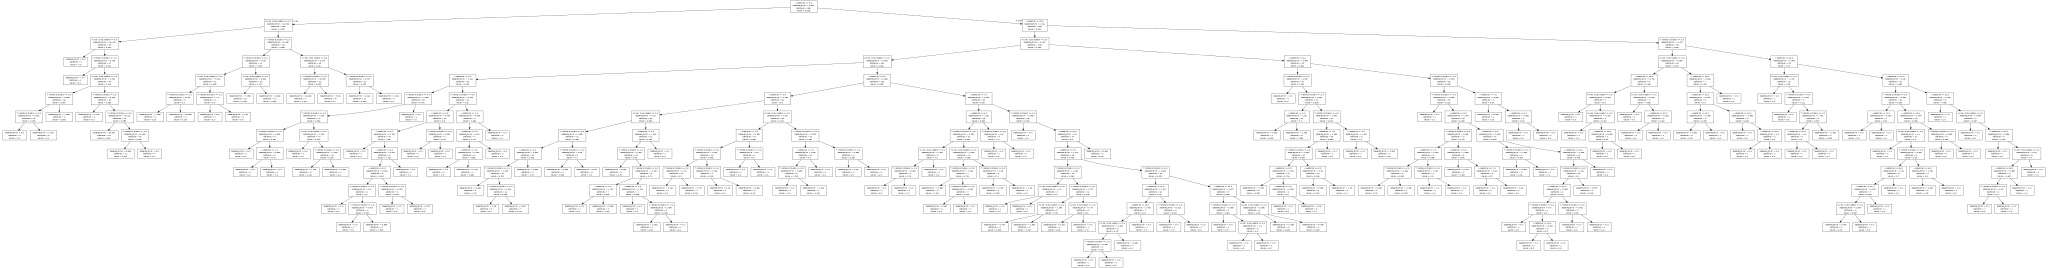

In [ ]:
# O con la librería graphviz
import graphviz

# Export_graphviz
dot_data = tree.export_graphviz(arbol, out_file=None, feature_names=list(X.columns))
graph = graphviz.Source(dot_data)
graph

## 0305 Realizamos una predicción
Una vez el modelo está entrenado (definido) podemos pasarle datos para obtener las prediciones correspondientes de la variable objetivo.

Para esto utilizamos el método .[predict()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict).

In [ ]:
# Predicción
prediccion = arbol.predict(X)

In [ ]:
# Cómo de buena es la predicción?
from sklearn.metrics import mean_squared_error

mean_squared_error(y, prediccion, squared=False)

1.755637153978234

# 05 EJERCICIO
Entrena un árbol de regresión con todas las variables predictoras disponibles para predecir la variable 'Nota'.

Prueba con profundidades de 3, 5, 20 y compara la calidad de cada predicción con la del árbol de las celdas anteriores.

Visualiza los distintos árboles y reflexiona sobre cómo ha conseguido mejorar la capacidad predictiva a medida que aumenta la profundidad de la arquitectura.

In [ ]:
# Siguiendo el ejemplo de las diapositivas, entrenaremos un modelo
X = df.drop("Nota", axis=1)
y = df["Nota"]

In [ ]:
# Inicializamos los árboles.
arbol_3 = tree.DecisionTreeRegressor(max_depth=3)
arbol_5 = tree.DecisionTreeRegressor(max_depth=5)
arbol_20 = tree.DecisionTreeRegressor(max_depth=20)

In [ ]:
# Entrenamos los árboles
arbol_3 = arbol_3.fit(X=X, y=y)
arbol_5 = arbol_5.fit(X=X, y=y)
arbol_20 = arbol_20.fit(X=X, y=y)

In [ ]:
# Predicciones
prediccion_3 = arbol_3.predict(X)
prediccion_5 = arbol_5.predict(X)
prediccion_20 = arbol_20.predict(X)

In [ ]:
# Evaluación predicciones
print("Arbol depth=3, ", round(mean_squared_error(y, prediccion_3, squared=False), 2))
print("Arbol depth=5, ", round(mean_squared_error(y, prediccion_5, squared=False), 2))
print("Arbol depth=20, ", round(mean_squared_error(y, prediccion_20, squared=False), 2))

Arbol depth=3,  2.0
Arbol depth=5,  1.69
Arbol depth=20,  0.0


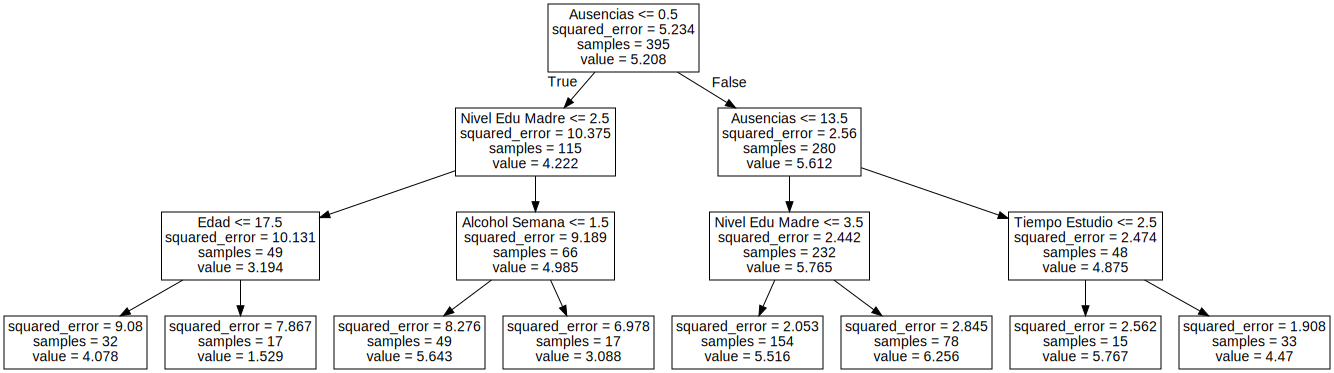

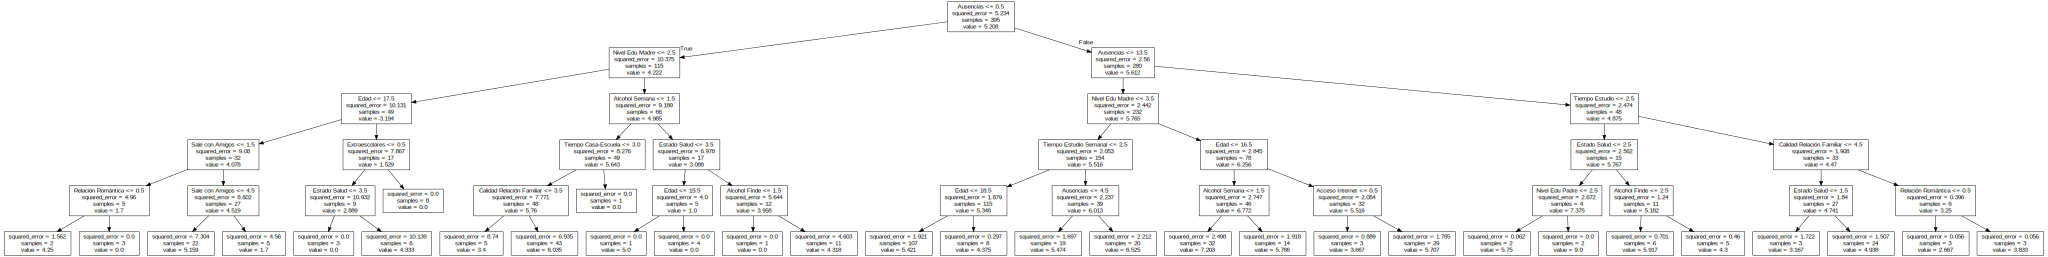

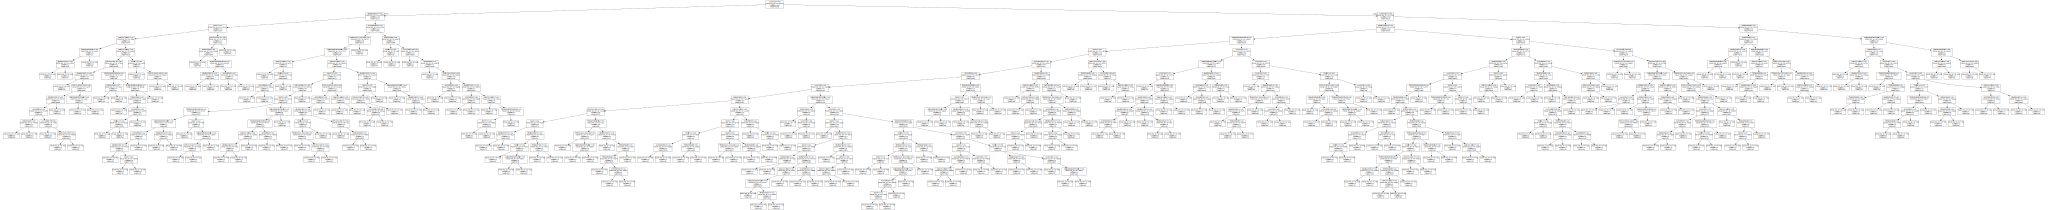

In [ ]:
# Export_graphviz
for arbol in [arbol_3, arbol_5, arbol_20]:
    dot_data = tree.export_graphviz(arbol, out_file=None, feature_names=list(X.columns))
    display(graphviz.Source(dot_data))